# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial" 
wkey = "99f0c97e150bae9724a43e21407bf1ce"
appid = wkey
settings = {"units": "imperial", "appid": wkey}
url = f"{url}appid={wkey}&units={units}"
url

'http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperial'

In [4]:
query = f"{url}appid={api_key}&units={units}&q="

In [5]:
latitude = []
longitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
dates = []

for x in range(len(cities)):
    response = requests.get(f"{query}{cities[x]}").json()
    
    try:
        temperature.append(response['main']['temp_max'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        dates.append(response['dt'])
    except KeyError:
        temperature.append(np.nan)
        latitude.append(np.nan)
        longitude.append(np.nan)
        humidity.append(np.nan)
        wind_speed.append(np.nan)
        dates.append(np.nan)
    
    try:
        cloudiness.append(response['clouds']['all'])
    except KeyError:
        cloudiness.append(0)
        
    print(f"Processing record {x + 1} | {cities[x]}")
    print(f"{query}{cities[x]}")

print("--------------------------------------------")
print("Data Processing Complete")
print("--------------------------------------------")


weather_df = pd.DataFrame({"City": cities,
                           "Latitude": latitude,
                           "Longitude": longitude,
                           "Humidity": humidity,
                           "Max Temp": temperature,
                           "Cloudiness": cloudiness,
                           "Wind Speed": wind_speed,
                           "Date": dates
                          })

Processing record 1 | vaini
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=vaini
Processing record 2 | victoria
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=victoria
Processing record 3 | honiara
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=honiara
Processing record 4 | rabo de peixe
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=rabo de peixe
Processing record 5 | luwuk
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=luwuk
Processing record 6 | ne

Processing record 44 | castro
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=castro
Processing record 45 | varkkallai
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=varkkallai
Processing record 46 | biak
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=biak
Processing record 47 | san ignacio
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=san ignacio
Processing record 48 | puerto ayora
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=puerto ayora
Processin

Processing record 86 | tsihombe
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=tsihombe
Processing record 87 | ambanja
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=ambanja
Processing record 88 | glomfjord
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=glomfjord
Processing record 89 | port hardy
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=port hardy
Processing record 90 | asekeyevo
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=asekeyevo
Processin

Processing record 128 | kaitangata
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=kaitangata
Processing record 129 | dikson
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=dikson
Processing record 130 | ribeira grande
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=ribeira grande
Processing record 131 | provideniya
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=provideniya
Processing record 132 | westerly
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=w

Processing record 170 | saint-augustin
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=saint-augustin
Processing record 171 | tilichiki
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=tilichiki
Processing record 172 | ridgecrest
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=ridgecrest
Processing record 173 | nizhneyansk
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=nizhneyansk
Processing record 174 | gijon
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&

Processing record 212 | kalmunai
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=kalmunai
Processing record 213 | sao joao da barra
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=sao joao da barra
Processing record 214 | baruun-urt
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=baruun-urt
Processing record 215 | sinjah
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=sinjah
Processing record 216 | fukue
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=fuku

Processing record 254 | tolbazy
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=tolbazy
Processing record 255 | wembley
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=wembley
Processing record 256 | labuhan
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=labuhan
Processing record 257 | husavik
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=husavik
Processing record 258 | roma
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=roma
Processing record 259 | di

Processing record 296 | viligili
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=viligili
Processing record 297 | severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=severo-kurilsk
Processing record 298 | dongsheng
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=dongsheng
Processing record 299 | rio cuarto
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=rio cuarto
Processing record 300 | atbasar
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=at

Processing record 338 | mbanza-ngungu
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=mbanza-ngungu
Processing record 339 | teeli
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=teeli
Processing record 340 | kudahuvadhoo
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=kudahuvadhoo
Processing record 341 | novi ligure
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=novi ligure
Processing record 342 | port blair
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q

Processing record 380 | saint george
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=saint george
Processing record 381 | blenheim
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=blenheim
Processing record 382 | kualakapuas
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=kualakapuas
Processing record 383 | ust-shonosha
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=ust-shonosha
Processing record 384 | praia da vitoria
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=

Processing record 421 | homer
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=homer
Processing record 422 | breves
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=breves
Processing record 423 | bud
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=bud
Processing record 424 | brookings
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=brookings
Processing record 425 | inhambane
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=inhambane
Processing record 426 | af

Processing record 463 | nuristan
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=nuristan
Processing record 464 | cumaribo
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=cumaribo
Processing record 465 | dosso
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=dosso
Processing record 466 | palasa
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=palasa
Processing record 467 | uddevalla
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=uddevalla
Processing record 

Processing record 505 | samoded
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=samoded
Processing record 506 | play cu
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=play cu
Processing record 507 | mezhdurechensk
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=mezhdurechensk
Processing record 508 | nouadhibou
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=nouadhibou
Processing record 509 | sorvag
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=sorvag
Pr

Processing record 548 | qingdao
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=qingdao
Processing record 549 | filadelfia
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=filadelfia
Processing record 550 | kotelnich
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=kotelnich
Processing record 551 | sawtell
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=sawtell
Processing record 552 | vikhorevka
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=vikhorevka
Proc

Processing record 589 | avera
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=avera
Processing record 590 | kayerkan
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=kayerkan
Processing record 591 | zhangjiakou
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=zhangjiakou
Processing record 592 | alberton
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=alberton
Processing record 593 | fort saint john
http://api.openweathermap.org/data/2.5/weather?appid=99f0c97e150bae9724a43e21407bf1ce&units=imperialappid=99f0c97e150bae9724a43e21407bf1ce&units=imperial&q=fort saint j

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_df.to_csv("output_data_cities.csv", encoding='utf-8', index=False)

In [8]:
weather_df.head()

,City,Latitude,Longitude,Humidity,Max Temp,Cloudiness,Wind Speed,Date
0,vaini,15.34,74.49,86.0,298.709,97,4.44,1.562629e+09
1,victoria,5.28,115.24,94.0,298.150,75,2.12,1.562629e+09
2,honiara,-9.43,159.96,74.0,302.150,75,1.50,1.562629e+09
3,rabo de peixe,37.80,-25.58,82.0,292.150,20,2.60,1.562629e+09
4,luwuk,-0.95,122.79,95.0,291.171,99,2.26,1.562629e+09


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

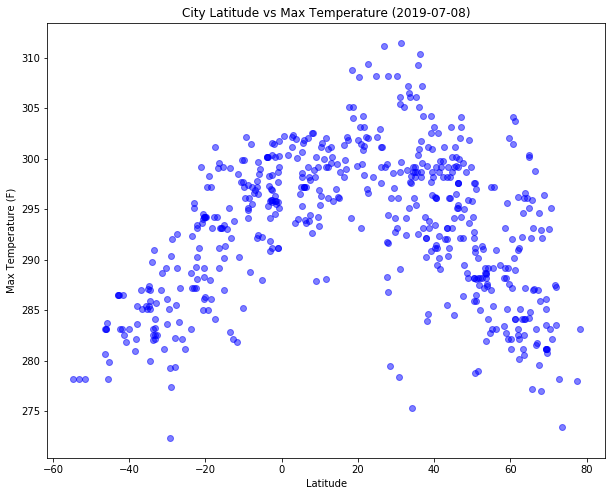

In [12]:
plt.figure(figsize=(10,8))
plt.scatter(weather_df["Latitude"], weather_df["Max Temp"], color='blue', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs Max Temperature ({datetime.now().date()})')
plt.savefig("LatVsTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

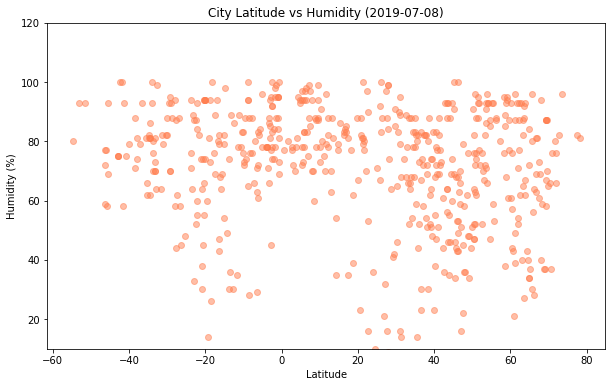

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], color='coral', alpha=0.5)
plt.ylim(10,120)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity ({datetime.now().date()})')
plt.savefig("LatVsHumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

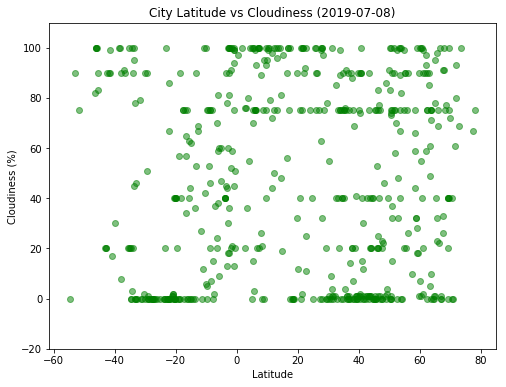

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], color='green', alpha=0.5)
plt.ylim(-20,(weather_df["Cloudiness"].max()+10))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness ({datetime.now().date()})')
plt.savefig("LatVsCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

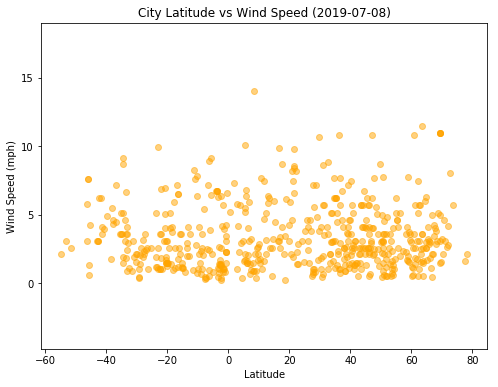

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], color='orange', alpha=0.5)
plt.ylim((weather_df["Wind Speed"].min()-5),(weather_df["Wind Speed"].max()+5))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed ({datetime.now().date()})')
plt.savefig("LatVsWind.png")
plt.show()